We will now do ocer on some of our aligned images that we got in our prevoius files

# Importing libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,092 kB/s)
debconf: unable to initia

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from skimage.filters import threshold_local
import pytesseract
import re

from pytesseract import Output

# Converting image to grayscale

In [ ]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [ ]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


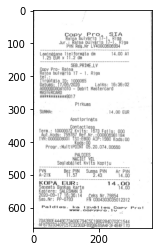

In [ ]:
#reading image 
img=cv2.imread('/content/reciept_2.png')
plt.imshow(img)

In [ ]:
def bw_scanner(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    T = threshold_local(gray, 21, offset = 5, method = "gaussian")
    return (gray > T).astype("uint8") * 255

In [ ]:
gray_image=bw_scanner(img)

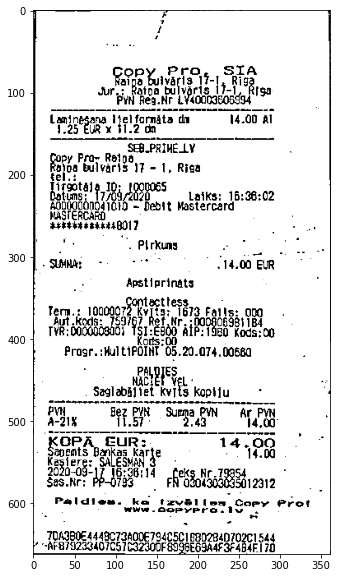

In [ ]:
plot_gray(gray_image)

# Text box detection

In [ ]:
def text_box_detection(image):
  d = pytesseract.image_to_data(image, output_type=Output.DICT)
  n_boxes = len(d['level'])
  boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
  for i in range(n_boxes):
      (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
      boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
      
  return boxes

In [ ]:
boxes=text_box_detection(gray_image)

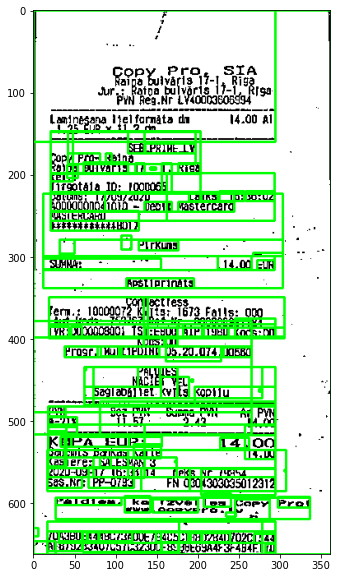

In [ ]:
plot_rgb(boxes)

# Text recognisation

In [ ]:
extracted_text = pytesseract.image_to_string(img)
print(extracted_text)

     

emai 1 1 a,

  

 

SEB_PRIWE_LY
fhe BbiveeIS 17 - 1. aga

sa ae Laiks: 16:36:02
‘Debit Mastercard

ee 7
Pirkuns
SUMMA: 14.00 EUR
Apst iprinats

Term.: 0000079991 2¢8! $879 Falls:
CAE i te
Progr. :MultiPOT 8.20.074.00660
Es
sniwsh el kvits Kopiju

oF PYN Suge PN

   

UR 14.00
jankas karte 14.1

ae ASC SEBS 2012

 

Paldies. ue SexSiign,gory Pret

-6on ene

44480) 4050) sepeean7070 544
. REET ODE Teac oc (F170



# Extracting numbers

In [ ]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [ ]:
amounts = find_amounts(extracted_text)
amounts

[14.0, 8.2]

The grand total will be maximum one

In [ ]:
max(amounts)

14.0